In [4]:
from openqaoa.problems.problem import MaximumCut
from openqaoa.workflows.optimizer import QAOA
from openqaoa.devices import create_device
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def gamma(x):
    return np.pi * (x + 2) / (x + 4)

def beta(x):
    return np.pi / (x + 4)

In [53]:
ns = np.arange(3, 8)

In [74]:
betas = []
gammas = []

for n in ns:
    print(n)
    b = []
    g = []
    for _ in range(10):
        problem = MaximumCut.random_instance(n_nodes=n, edge_probability=0.9).get_qubo_problem()
        q = QAOA()
        vectorized_device = create_device(location='local', name='vectorized')
        q.set_device(vectorized_device)
        q.set_circuit_properties(p=1, param_type='standard', init_type='rand', mixer_hamiltonian='x')
        q.set_backend_properties(prepend_state=None, append_state=None)
        q.set_classical_optimizer(method='rmsprop', jac='param_shift', maxiter=200, \
                                         optimization_progress=True, cost_progress=True, parameter_log=True)
        q.compile(problem)
        q.optimize()

        b.append(min(q.results.optimized['optimized angles']))
        g.append(max(q.results.optimized['optimized angles']))
        
    betas.append(np.mean(b))
    gammas.append(np.mean(g))

3
Qubits in the specified Hamiltonian are remapped to [0, 1].Please specify the physical quantum register as a qubit layout argument in the backend
4
5
6
7


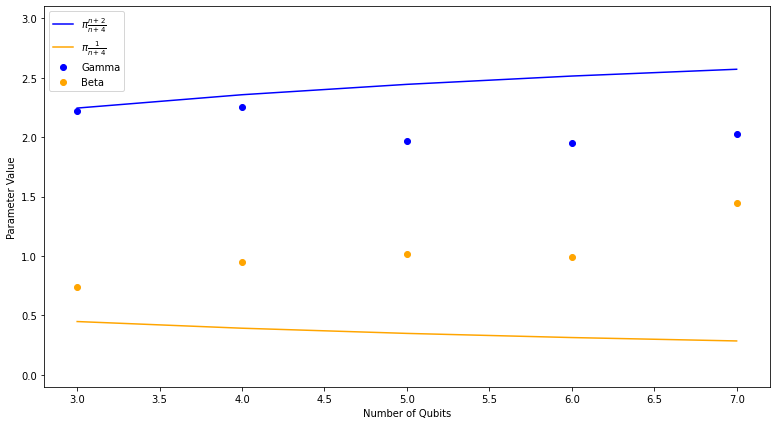

In [75]:
plt.figure(figsize=(13, 7))
plt.plot(ns, gamma(ns), label=r'$\pi \frac{n+2}{n+4}$', color='blue')
plt.plot(ns, beta(ns), label=r'$\pi \frac{1}{n+4}$', color='orange')
plt.scatter(ns, gammas, label='Gamma', color='blue')
plt.scatter(ns, betas, label='Beta', color='orange')
plt.xlabel('Number of Qubits')
plt.ylabel("Parameter Value")
plt.ylim(-0.1, 3.1)
plt.legend()
plt.show()

In [87]:
ps = np.arange(2, 10)
qs = np.arange(3, 10)

normal_p, warm_p = [], []
normal_q, warm_q = [], []

In [88]:
problem = MaximumCut.random_instance(n_nodes=5, edge_probability=0.9).get_qubo_problem()
q = QAOA()
vectorized_device = create_device(location='local', name='vectorized')
q.set_device(vectorized_device)
q.set_circuit_properties(p=1, param_type='standard', init_type='custom', mixer_hamiltonian='x', variational_params_dict={'betas': [0.1], 'gammas': [0.1]})
q.set_backend_properties(prepend_state=None, append_state=None)
q.set_classical_optimizer(method='rmsprop', jac='param_shift', maxiter=200, \
                                 optimization_progress=True, cost_progress=True, parameter_log=True)
q.compile(problem)
q.optimize()
opt_results = q.results
warm_start = opt_results.optimized['optimized angles']

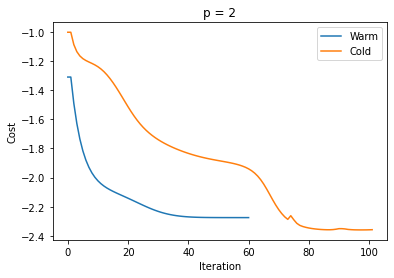

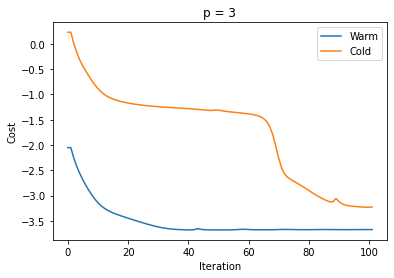

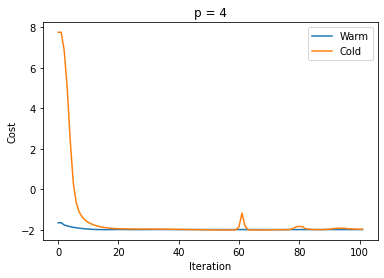

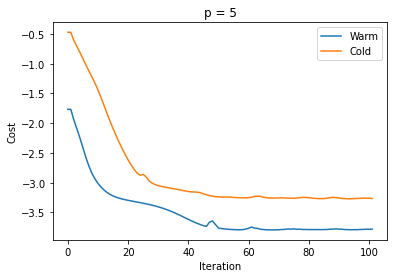

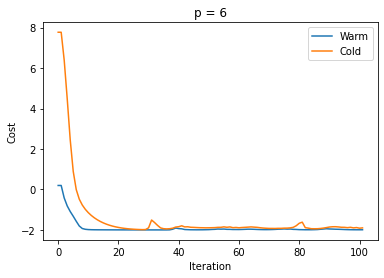

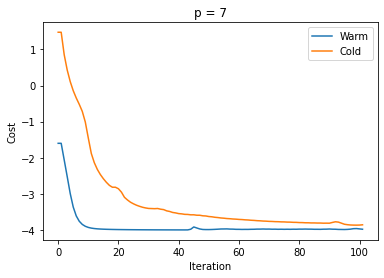

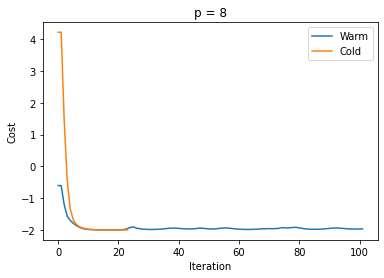

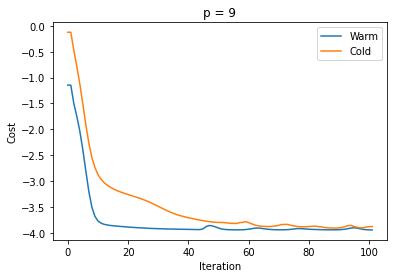

In [94]:
for p in ps:
    problem = MaximumCut.random_instance(n_nodes=5, edge_probability=0.9).get_qubo_problem()
    q = QAOA()
    vectorized_device = create_device(location='local', name='vectorized')
    q.set_device(vectorized_device)
    q.set_circuit_properties(p=p, param_type='standard', init_type='custom', mixer_hamiltonian='x', \
                             variational_params_dict={'betas': [warm_start[0]] * p, 'gammas': [warm_start[1]] * p})
    q.set_backend_properties(prepend_state=None, append_state=None)
    q.set_classical_optimizer(method='rmsprop', jac='param_shift', maxiter=100, \
                                     optimization_progress=True, cost_progress=True, parameter_log=True)
    q.compile(problem)
    q.optimize()
    opt_results = q.results
    
    plt.plot(opt_results.intermediate["intermediate cost"], label='Warm')
    
    q = QAOA()
    vectorized_device = create_device(location='local', name='vectorized')
    q.set_device(vectorized_device)
    q.set_circuit_properties(p=p, param_type='standard', init_type='rand', mixer_hamiltonian='x')
    q.set_backend_properties(prepend_state=None, append_state=None)
    q.set_classical_optimizer(method='rmsprop', jac='param_shift', maxiter=100, \
                                     optimization_progress=True, cost_progress=True, parameter_log=True)
    q.compile(problem)
    q.optimize()
    opt_results = q.results
    
    plt.title("p = " + str(p))
    plt.plot(opt_results.intermediate["intermediate cost"], label='Cold')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

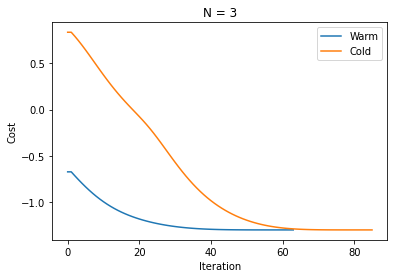

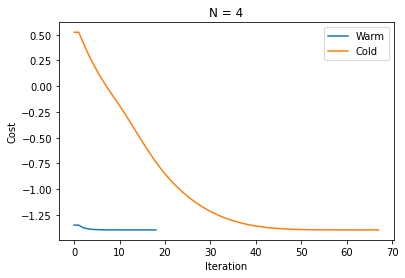

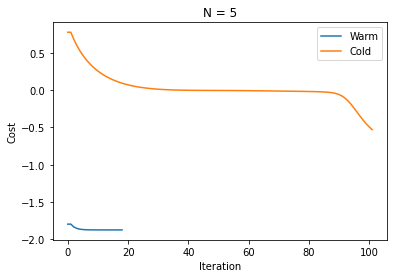

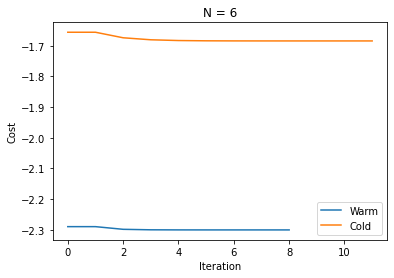

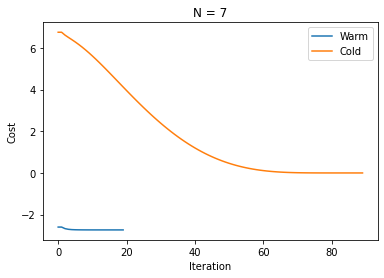

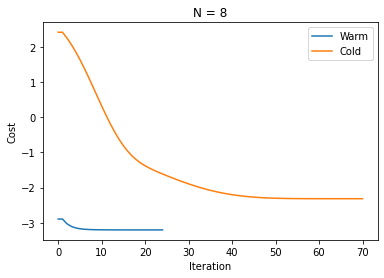

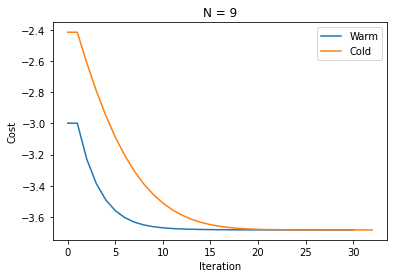

In [95]:
for n in qs:
    problem = MaximumCut.random_instance(n_nodes=n, edge_probability=0.9).get_qubo_problem()
    q = QAOA()
    vectorized_device = create_device(location='local', name='vectorized')
    q.set_device(vectorized_device)
    q.set_circuit_properties(p=1, param_type='standard', init_type='custom', mixer_hamiltonian='x', \
                             variational_params_dict={'betas': [warm_start[0]], 'gammas': [warm_start[1]]})
    q.set_backend_properties(prepend_state=None, append_state=None)
    q.set_classical_optimizer(method='rmsprop', jac='param_shift', maxiter=100, \
                                     optimization_progress=True, cost_progress=True, parameter_log=True)
    q.compile(problem)
    q.optimize()
    opt_results = q.results
    
    plt.plot(opt_results.intermediate["intermediate cost"], label='Warm')
    
    q = QAOA()
    vectorized_device = create_device(location='local', name='vectorized')
    q.set_device(vectorized_device)
    q.set_circuit_properties(p=1, param_type='standard', init_type='rand', mixer_hamiltonian='x')
    q.set_backend_properties(prepend_state=None, append_state=None)
    q.set_classical_optimizer(method='rmsprop', jac='param_shift', maxiter=100, \
                                     optimization_progress=True, cost_progress=True, parameter_log=True)
    q.compile(problem)
    q.optimize()
    opt_results = q.results
    
    plt.title("N = " + str(n))
    plt.plot(opt_results.intermediate["intermediate cost"], label='Cold')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()